In [25]:
#carga de librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.special as special 
from scipy.optimize import curve_fit
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
#cargar archivo csv desde seaborn 
df=pd.read_csv('Canada_limpio.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   2317 non-null   object 
 1   name                                          2317 non-null   object 
 2   description                                   2317 non-null   object 
 3   neighborhood_overview                         2317 non-null   object 
 4   picture_url                                   2317 non-null   object 
 5   host_name                                     2317 non-null   object 
 6   host_since                                    2317 non-null   object 
 7   host_response_time                            2317 non-null   object 
 8   host_response_rate                            2317 non-null   object 
 9   host_is_superhost                             2317 non-null   o

In [28]:
#cargar archivo csv desde seaborn 
df1=pd.read_csv('Canada_limpio.csv')
df1 = df1.drop(['Unnamed: 0'], axis=1)

In [29]:
f1=df1

In [30]:
#convertimos las variables de tipo object a tipo numérico 
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})
f1['has_availability'] = f1['has_availability'].replace({'f': 0, 't': 1})
frecuencias = f1['property_type'].value_counts()
f1['property_type'] = f1['property_type'].map(frecuencias)


f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


f1['host_response_time'] = f1['host_response_time'].map({
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4,
    'Desconocido' : 5
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\josse\AppData\Local\Temp\ipykernel_20972\3032408551.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_20972\3032408551.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_20972\3032408551.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

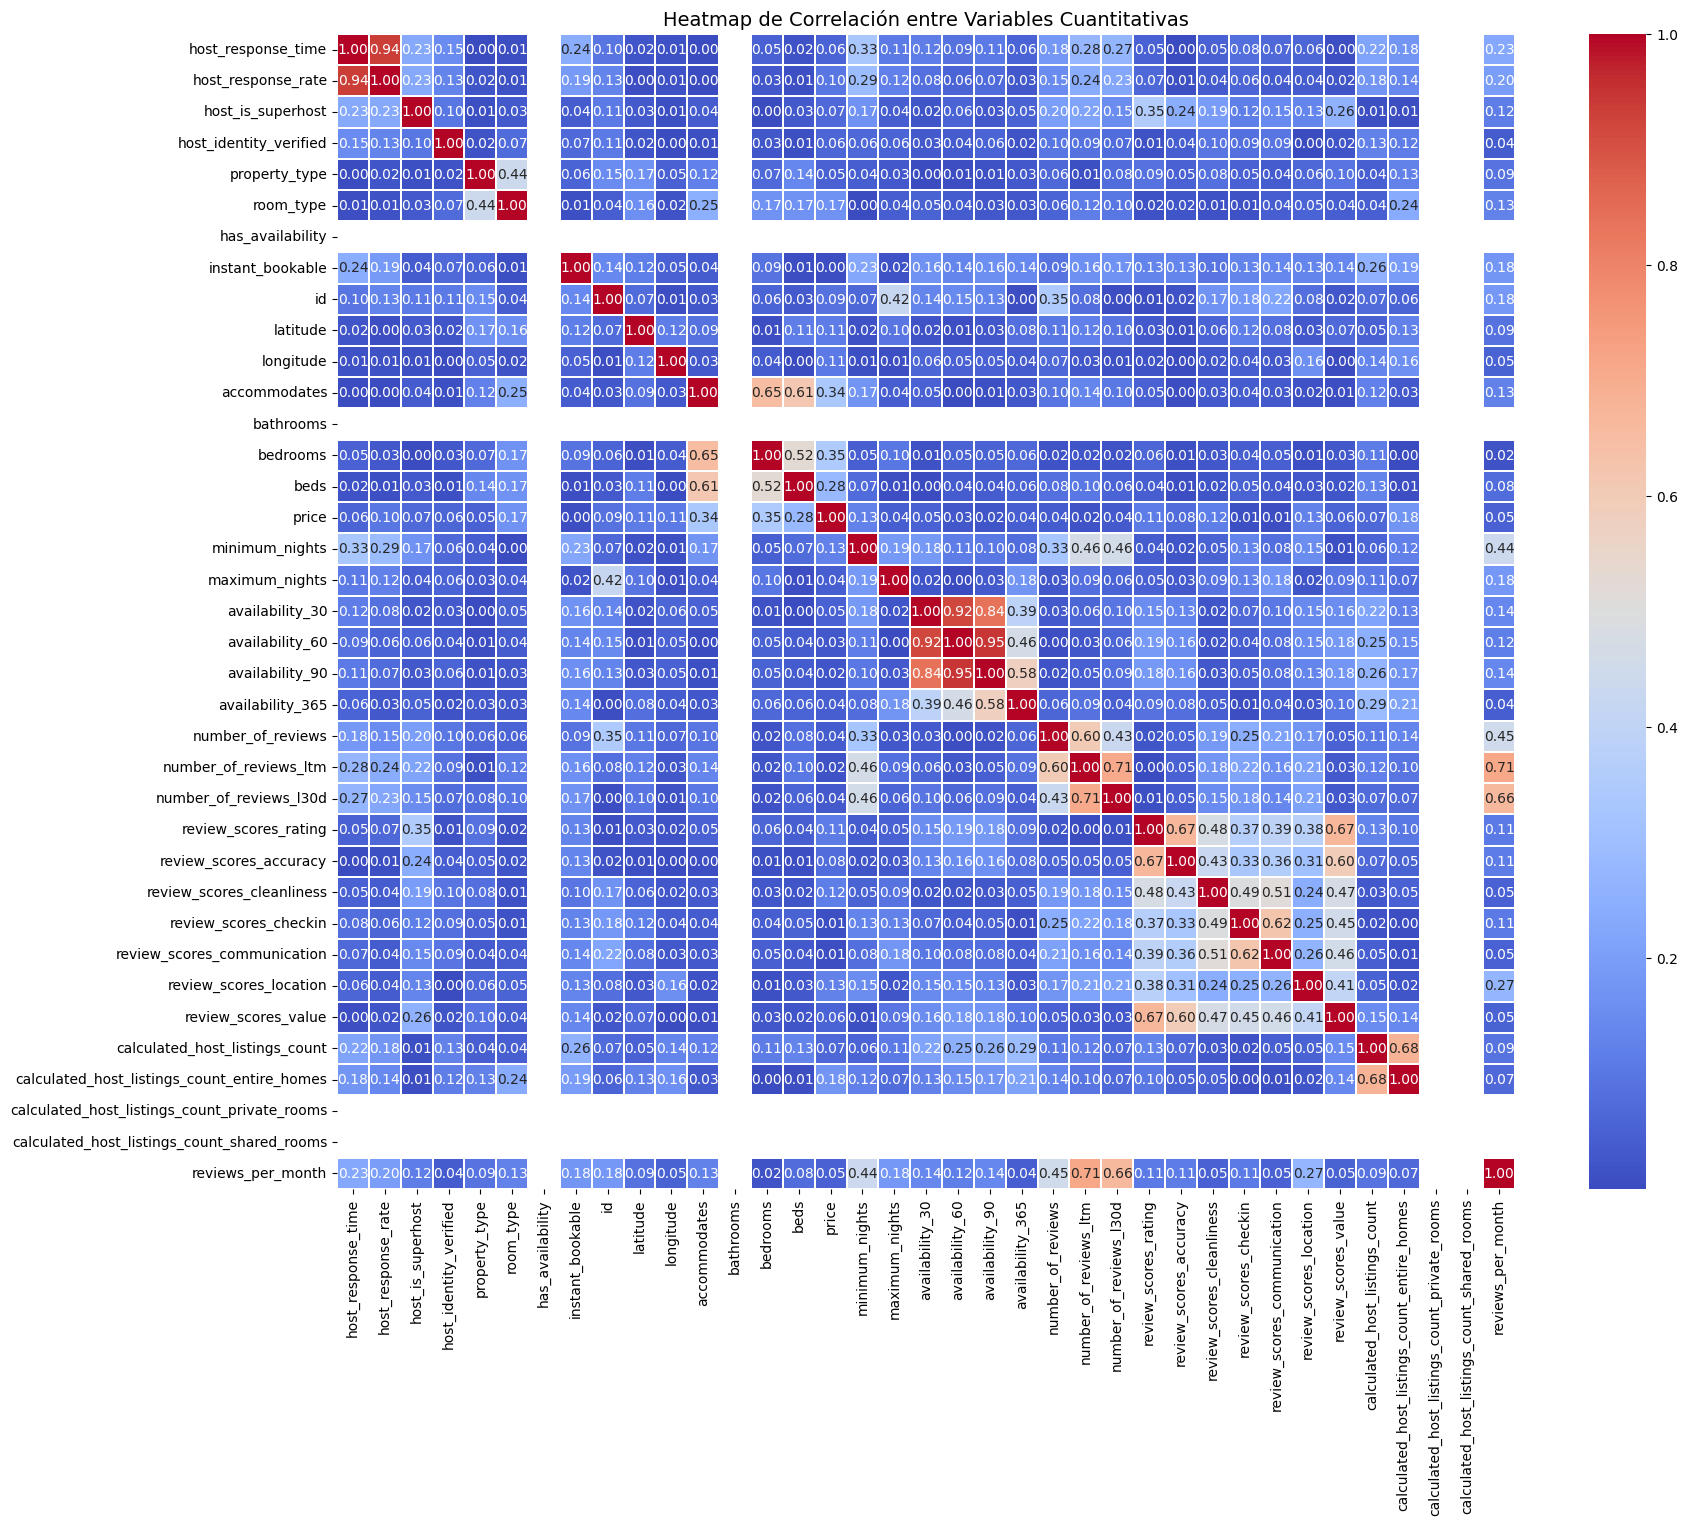

In [31]:
df1_numeric = f1.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df1_numeric.corr()
corr_matrix2= abs(corr_matrix)

# Crear el heatmap
plt.figure(figsize=(19, 15))  # Ajusta el tamaño
sns.heatmap(corr_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.10)

# Configurar el título
plt.title("Heatmap de Correlación entre Variables Cuantitativas", fontsize=14)

# Mostrar la gráfica
plt.show()

In [32]:
#verificar los valores sin repetirse de una columna 
unico = np.unique(df['room_type'])
unico
conteo = df["room_type"].value_counts()  # Cuenta por categoría
conteo

room_type
Entire home/apt    1970
Private room        313
Hotel room           21
Shared room          13
Name: count, dtype: int64

In [33]:
unico = np.unique(df['property_type'])
unico

array(['Barn', 'Camper/RV', 'Castle', 'Entire bungalow', 'Entire cabin',
       'Entire chalet', 'Entire condo', 'Entire cottage',
       'Entire guest suite', 'Entire guesthouse', 'Entire home',
       'Entire home/apt', 'Entire loft', 'Entire place',
       'Entire rental unit', 'Entire serviced apartment',
       'Entire townhouse', 'Entire vacation home', 'Entire villa',
       'Private room in bed and breakfast', 'Private room in bungalow',
       'Private room in casa particular', 'Private room in condo',
       'Private room in cottage', 'Private room in guest suite',
       'Private room in guesthouse', 'Private room in home',
       'Private room in hostel', 'Private room in nature lodge',
       'Private room in rental unit',
       'Private room in serviced apartment', 'Private room in townhouse',
       'Private room in villa', 'Room in aparthotel',
       'Room in bed and breakfast', 'Room in boutique hotel',
       'Room in hotel', 'Room in serviced apartment',
       'Sh

In [34]:
#Convertimos la variable dependiente a dicotómica
df['room_type']= df['room_type'].replace(["Hotel room", "Shared room", "Private room"], "No Entire")

#convertimos host_response_time en dicotómica 
df['host_response_time']=df['host_response_time'].replace(["within an hour", "within a few hours", "within a day"], "Rapida")
df['host_response_time']=df['host_response_time'].replace(["a few days or more", "Desconocido"], "No rapida")

# Para convertir property_type. Listas de palabras clave para clasificar
entire_place_keywords = [
    'Entire', 'Boat', 'Campsite', 'Castle', 'Dome', 
    'Earthen home', 'Farm stay', 'Holiday park', 
    'Hut', 'Tiny home', 'Tower', 'Shipping container', 'Tent'
]
# Aquí asumimos que el resto se clasifica como "Room"

# Función para asignar una única categoría
def categorize_property(property_type):
    # Si se encuentra alguna palabra clave en entire_place_keywords, se clasifica como 'Entire Place'
    if any(keyword in property_type for keyword in entire_place_keywords):
        return 'Entire Place'
    # Si no, se asigna 'No Entire'
    else:
        return 'No Entire'

# Aplicar la función a la columna property_type para crear una nueva columna
df['property_type'] = df['property_type'].apply(categorize_property)

# Convertir la columna 'host_response_rate' a dicotómica 
# Función para limpiar y convertir los valores
def clean_and_convert(value):
    if value == '-' or value is None:  # Tratamos -% como valor bajo 
        return -1 
    try:
        return float(value.replace('%', '')) 
    except ValueError:
        return None  

df['host_response_rate_num'] = df['host_response_rate'].apply(clean_and_convert)
def categorize_response_rate(value):
    if value < 50:  
        return 'Respuesta baja'
    else:  
        return 'Respuesta alta'
df['host_response_rate'] = df['host_response_rate_num'].apply(categorize_response_rate)

#minimum nights
def categorize_minimum_nights(value):
    if value < 2:
        return 'Bajo'
    else:
        return 'Alto'

df['minimum_nights'] = df['minimum_nights'].apply(categorize_minimum_nights)

#maximum nights
def categorize_maximum_nights(value):
    if value < 201:
        return 'Bajo'
    else:
        return 'Alto'

df['maximum_nights'] = df['maximum_nights'].apply(categorize_maximum_nights)


df

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate_num
0,https://www.airbnb.com/rooms/1174222393432136530,The Impérial Suite + Parking + AC,Located in the heart of the action on rue Sain...,No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Johan,2019-01-15,Rapida,Respuesta alta,t,...,4.97,5.00,4.70,4.81,10.0,10.0,0.0,0.0,7.82,100.0
1,https://www.airbnb.com/rooms/42687485,206 - Les Lofts 1048,Situated in a lovely historic building in the ...,"Old Québec, a UNESCO world heritage treasure, ...",https://a0.muscache.com/pictures/656ff41c-4875...,Reception From Lofts Vieux-Québec,2014-11-13,No rapida,Respuesta alta,f,...,4.92,4.75,5.00,4.83,6.1,4.3,0.0,0.0,0.24,NaN
2,https://www.airbnb.com/rooms/1209738868029751192,Appartement complet -Haute-ville,The whole group will enjoy quick and easy acce...,No se proporcionan detalles,https://a0.muscache.com/pictures/hosting/Hosti...,Mathieu,2020-06-05,No rapida,Respuesta alta,f,...,5.00,5.00,4.80,4.70,2.0,1.0,0.0,0.0,2.40,NaN
3,https://www.airbnb.com/rooms/50586493,Loft in the old city 12,Luxurious and modern loft in the heart of the ...,No se proporcionan detalles,https://a0.muscache.com/pictures/eeac0775-4692...,Maxime,2015-08-05,Rapida,Respuesta alta,f,...,4.71,4.64,4.93,4.50,7.0,7.0,0.0,0.0,0.36,100.0
4,https://www.airbnb.com/rooms/138381,Bed & Breakfast La California kudu,This home away from home is a superb pied-à-te...,"Located on chemin Saint-Louis, near the Siller...",https://a0.muscache.com/pictures/3d1d51d0-5e04...,Mary,2011-06-07,Rapida,Respuesta alta,f,...,4.94,4.96,4.82,4.92,3.0,0.0,0.0,0.0,1.08,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,https://www.airbnb.com/rooms/889303454774118973,Site Universitaire et collégial.,"Urban, bright, fully furnished home. Within wa...",No se proporcionan detalles,https://a0.muscache.com/pictures/hosting/Hosti...,France,2023-02-01,Rapida,Respuesta alta,t,...,5.00,5.00,4.80,4.70,6.0,6.0,0.0,0.0,2.40,100.0
2313,https://www.airbnb.com/rooms/1161624129533538757,Visit Quebec - while living in a Neighborhood,A neighborhood to discover on foot (with a bus...,No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Judi,2023-05-31,No rapida,Respuesta alta,f,...,5.00,5.00,4.80,4.70,1.0,1.0,0.0,0.0,2.40,NaN
2314,https://www.airbnb.com/rooms/738249707069283184,Sumptuous apartment in Quebec City,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Liliana,2020-08-24,Rapida,Respuesta alta,f,...,4.58,4.66,4.94,4.65,1.0,1.0,0.0,0.0,3.34,100.0
2315,https://www.airbnb.com/rooms/1014458985577206515,Nice little one bedroom apartment,Keep it simple at this peaceful and centrally ...,No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Honore,2019-11-27,Rapida,Respuesta alta,f,...,4.80,4.78,4.65,4.66,1.0,1.0,0.0,0.0,7.26,100.0


In [35]:
unico = np.unique(df['property_type'])
unico

array(['Entire Place', 'No Entire'], dtype=object)

In [36]:
unico = np.unique(df['host_response_rate'])
unico

array(['Respuesta alta', 'Respuesta baja'], dtype=object)

In [37]:
unico = np.unique(df['minimum_nights'])
unico

array(['Alto', 'Bajo'], dtype=object)

In [38]:
unico = np.unique(df['maximum_nights'])
unico

array(['Alto', 'Bajo'], dtype=object)

In [39]:
unico = np.unique(df['has_availability'])
unico

array(['t'], dtype=object)

**Lineal**

In [40]:
#definimos variables independientes
Vars_Indep1 = df[['number_of_reviews', 'number_of_reviews_ltm']]
Vars_Indep2 = df[['availability_365', 'availability_90', 'availability_60']]
Vars_Indep3 = df[['availability_365', 'number_of_reviews_ltm']]
Vars_Indep4 = df[['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes']]
Vars_Indep5 = df[['calculated_host_listings_count_private_rooms', 'accommodates']]
Vars_Indep6 = df[['accommodates', 'price', 'bedrooms']]
Vars_Indep7 = df[['review_scores_value', 'availability_30']]
Vars_Indep8 = df[['accommodates', 'price', 'bedrooms']]
Vars_Indep9 = df[['number_of_reviews_ltm' ,'calculated_host_listings_count', 'reviews_per_month']]
Vars_Indep10 = df[['number_of_reviews', 'availability_365']]

In [41]:
#Definimos variables dependientes 
#Dicotómicas por naturaleza 
Var_Dep1 = df['host_is_superhost']
Var_Dep2 = df['host_identity_verified']
Var_Dep3 = df['has_availability']
Var_Dep4 = df['instant_bookable']
#Convertidas a dicotómicas 
Var_Dep5 = df['room_type']
Var_Dep6 = df['host_response_time']
Var_Dep7 = df['minimum_nights']
Var_Dep8 = df['property_type']
Var_Dep9 = df['host_response_rate']
Var_Dep10 = df['maximum_nights']

In [42]:
#Redefinimos las variables 
X1= Vars_Indep1
y1= Var_Dep1

X2= Vars_Indep2
y2= Var_Dep2

X3= Vars_Indep3
y3= Var_Dep3

X4= Vars_Indep4
y4= Var_Dep4

X5= Vars_Indep5
y5= Var_Dep5

X6= Vars_Indep6
y6= Var_Dep6

X7= Vars_Indep7
y7= Var_Dep7

X8= Vars_Indep8
y8= Var_Dep8

X9= Vars_Indep9
y9= Var_Dep9

X10 = Vars_Indep10
y10 = Var_Dep10


In [43]:
#Dividimos el conjutno de datos en la parte de entrenamiento y prueba: 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=None)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=None)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=None)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=None)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=None)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=None)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3, random_state=None)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3, random_state=None)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3, random_state=None)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.3, random_state=None)

In [44]:
#Se escalan todos los datos 
escalar1 = StandardScaler()
escalar2 = StandardScaler()
escalar3 = StandardScaler()
escalar4 = StandardScaler()
escalar5 = StandardScaler()
escalar6 = StandardScaler()
escalar7 = StandardScaler()
escalar8 = StandardScaler()
escalar9 = StandardScaler()
escalar10 = StandardScaler()

In [45]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba utilizaremos: 
X1_train = escalar1.fit_transform(X1_train)
X1_test = escalar1.transform(X1_test)

X2_train = escalar2.fit_transform(X2_train)
X2_test = escalar2.transform(X2_test)

X3_train = escalar3.fit_transform(X3_train)
X3_test = escalar3.transform(X3_test)

X4_train = escalar4.fit_transform(X4_train)
X4_test = escalar4.transform(X4_test)

X5_train = escalar5.fit_transform(X5_train)
X5_test = escalar5.transform(X5_test)

X6_train = escalar6.fit_transform(X6_train)
X6_test = escalar6.transform(X6_test)

X7_train = escalar7.fit_transform(X7_train)
X7_test = escalar7.transform(X7_test)

X8_train = escalar8.fit_transform(X8_train)
X8_test = escalar8.transform(X8_test)

X9_train = escalar9.fit_transform(X9_train)
X9_test = escalar9.transform(X9_test)

X8_train = escalar10.fit_transform(X10_train)
X8_test = escalar10.transform(X10_test)

In [46]:
#Definimos el algoritmo a utilizar 
from sklearn.linear_model import LogisticRegression
algoritmo1 = LogisticRegression()
algoritmo2 = LogisticRegression()
algoritmo3 = LogisticRegression()
algoritmo4 = LogisticRegression()
algoritmo5 = LogisticRegression()
algoritmo6 = LogisticRegression()
algoritmo7 = LogisticRegression()
algoritmo8 = LogisticRegression()
algoritmo9 = LogisticRegression()
algoritmo10 = LogisticRegression()

In [47]:
#entrenamos el modelo 
algoritmo1.fit(X1_train, y1_train)
algoritmo2.fit(X2_train, y2_train)
#algoritmo3.fit(X3_train, y3_train)
algoritmo4.fit(X4_train, y4_train)
algoritmo5.fit(X5_train, y5_train)
algoritmo6.fit(X6_train, y6_train)
algoritmo7.fit(X7_train, y7_train)
algoritmo8.fit(X8_train, y8_train)
algoritmo9.fit(X9_train, y9_train)
algoritmo10.fit(X10_train, y10_train)

LogisticRegression()

**host_is_superhost**

In [48]:
#Realizamos una predicción 
y1_pred = algoritmo1.predict(X1_test)
y1_pred

array(['f', 'f', 't', 'f', 'f', 'f', 't', 't', 't', 'f', 't', 't', 'f',
       'f', 'f', 'f', 't', 'f', 'f', 't', 'f', 'f', 't', 'f', 't', 'f',
       'f', 'f', 't', 'f', 't', 't', 'f', 'f', 'f', 'f', 'f', 'f', 't',
       't', 't', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f',
       'f', 'f', 'f', 't', 't', 'f', 'f', 't', 'f', 't', 't', 't', 't',
       'f', 'f', 'f', 'f', 'f', 'f', 't', 't', 't', 'f', 't', 'f', 'f',
       'f', 'f', 't', 't', 'f', 't', 'f', 't', 'f', 'f', 'f', 'f', 'f',
       'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f',
       'f', 't', 'f', 'f', 'f', 't', 'f', 't', 't', 'f', 'f', 'f', 't',
       'f', 't', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't', 'f',
       'f', 'f', 't', 'f', 't', 'f', 'f', 'f', 't', 'f', 'f', 'f', 't',
       't', 'f', 't', 'f', 'f', 't', 'f', 'f', 't', 't', 't', 'f', 'f',
       'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 't', 'f', 'f',
       'f', 't', 'f', 'f', 'f', 't', 'f', 't', 't', 'f', 't', 'f

In [49]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz1 = confusion_matrix(y1_test, y1_pred)
print('Matriz de Confusión: ')
print (matriz1)

Matriz de Confusión: 
[[252  91]
 [185 168]]


In [50]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision1 = precision_score(y1_test, y1_pred, average="binary", pos_label="t")
print('Precision del modelo:')
print(precision1)

Precision del modelo:
0.6486486486486487


In [51]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud1 = accuracy_score(y1_test, y1_pred)
print('Exactitud del modelo:')
print(exactitud1)

Exactitud del modelo:
0.603448275862069


In [52]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad1 = recall_score(y1_test, y1_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad1)

Sensibilidad del modelo:
0.7346938775510204


**host_identity_verified**

In [53]:
#Realizamos una predicción 
y2_pred = algoritmo2.predict(X2_test)
y2_pred

array(['t', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't

In [54]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz2 = confusion_matrix(y2_test, y2_pred)
print('Matriz de Confusión: ')
print (matriz2)

Matriz de Confusión: 
[[  0  30]
 [  0 666]]


In [55]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision2 = precision_score(y2_test, y2_pred, average="binary", pos_label="t")
print('Precision del modelo:')
print(precision2)

Precision del modelo:
0.9568965517241379


In [56]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud2 = accuracy_score(y2_test, y2_pred)
print('Exactitud del modelo:')
print(exactitud2)

Exactitud del modelo:
0.9568965517241379


In [57]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad2 = recall_score(y2_test, y2_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad2)

Sensibilidad del modelo:
0.0


**has_availability**

In [58]:
#Realizamos una predicción 
#y3_pred = algoritmo3.predict(X3_test)
#y3_pred

In [59]:
#Verifico la matriz de confusion 
#from sklearn.metrics import confusion_matrix
#matriz3 = confusion_matrix(y3_test, y3_pred)
#print('Matriz de Confusión: ')
#print (matriz3)

In [60]:
#Calculo de la precision del modelo 
#from sklearn.metrics import precision_score
#precision3 = precision_score(y3_test, y3_pred, average="binary", pos_label="t")
#print('Precision del modelo:')
#print(precision3)

In [61]:
#Calculo la exactitud del modelo 
#from sklearn.metrics import accuracy_score

#exactitud3 = accuracy_score(y3_test, y3_pred)
#print('Exactitud del modelo:')
#print(exactitud3)

In [62]:
#Calculo la sensibilidad del modelo 
#from sklearn.metrics import recall_score

#sensibilidad3 = recall_score(y3_test, y3_pred, average="binary", pos_label="f")
#print('Sensibilidad del modelo:')
#print(sensibilidad3)

**instant_bookable**

In [63]:
#Realizamos una predicción 
y4_pred = algoritmo4.predict(X4_test)
y4_pred

array(['f', 'f', 't', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f',
       'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 't',
       't', 't', 'f', 'f', 'f', 'f', 't', 'f', 'f', 't', 'f', 'f', 't',
       'f', 't', 'f', 't', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f',
       'f', 'f', 't', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 't', 't',
       'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f',
       't', 'f', 'f', 'f', 't', 'f', 't', 't', 't', 't', 'f', 'f', 'f',
       'f', 't', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f',
       'f', 't', 'f', 'f', 'f', 'f', 't', 'f', 't', 't', 'f', 'f', 'f',
       'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f',
       'f', 'f', 't', 'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't',
       'f', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 't',
       'f', 'f', 'f', 'f', 't', 'f', 't', 'f', 't', 'f', 'f', 'f', 'f',
       'f', 'f', 'f', 'f', 'f', 'f', 't', 'f', 'f', 'f', 'f', 't

In [64]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz4 = confusion_matrix(y4_test, y4_pred)
print('Matriz de Confusión: ')
print (matriz4)

Matriz de Confusión: 
[[313  55]
 [226 102]]


In [65]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision4 = precision_score(y4_test, y4_pred, average="binary", pos_label="t")
print('Precision del modelo:')
print(precision1)

Precision del modelo:
0.6486486486486487


In [66]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud4 = accuracy_score(y4_test, y4_pred)
print('Exactitud del modelo:')
print(exactitud4)

Exactitud del modelo:
0.5962643678160919


In [67]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad4 = recall_score(y4_test, y4_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad4)

Sensibilidad del modelo:
0.8505434782608695


**room_type**

In [68]:
#Realizamos una predicción 
y5_pred = algoritmo5.predict(X5_test)
y5_pred

array(['Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt',
       'Entire home/apt', 'Entire home/a

In [69]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz5 = confusion_matrix(y5_test, y5_pred)
print('Matriz de Confusión: ')
print (matriz5)

Matriz de Confusión: 
[[583   0]
 [113   0]]


In [70]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision5 = precision_score(y5_test, y5_pred, average="binary", pos_label="Entire home/apt")
print('Precision del modelo:')
print(precision5)

Precision del modelo:
0.8376436781609196


In [71]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud5 = accuracy_score(y5_test, y5_pred)
print('Exactitud del modelo:')
print(exactitud5)

Exactitud del modelo:
0.8376436781609196


In [72]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad5 = recall_score(y5_test, y5_pred, average="binary", pos_label="No Entire")
print('Sensibilidad del modelo:')
print(sensibilidad5)

Sensibilidad del modelo:
0.0


**host_response_time**

In [73]:
#Realizamos una predicción 
y6_pred = algoritmo6.predict(X6_test)
y6_pred

array(['Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida',
       'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida',
       'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida',
       'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida',
       'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida',
       'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida',
       'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida',
       'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida',
       'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida',
       'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida',
       'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida',
       'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida',
       'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida',
       'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida',
       'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapida', 'Rapi

In [74]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz6 = confusion_matrix(y6_test, y6_pred)
print('Matriz de Confusión: ')
print (matriz6)

Matriz de Confusión: 
[[  0  90]
 [  0 606]]


In [75]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision6 = precision_score(y6_test, y6_pred, average="binary", pos_label="Rapida")
print('Precision del modelo:')
print(precision6)

Precision del modelo:
0.8706896551724138


In [76]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud6 = accuracy_score(y6_test, y6_pred)
print('Exactitud del modelo:')
print(exactitud6)

Exactitud del modelo:
0.8706896551724138


In [77]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad6= recall_score(y6_test, y6_pred, average="binary", pos_label="No rapida")
print('Sensibilidad del modelo:')
print(sensibilidad6)

Sensibilidad del modelo:
0.0


**mimimun_nights**

In [78]:
#Realizamos una predicción 
y7_pred = algoritmo7.predict(X7_test)
y7_pred

array(['Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
      

In [79]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz7 = confusion_matrix(y7_test, y7_pred)
print('Matriz de Confusión: ')
print (matriz7)

Matriz de Confusión: 
[[529   0]
 [167   0]]


In [80]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision7 = precision_score(y7_test, y7_pred, average="binary", pos_label="Alto")
print('Precision del modelo:')
print(precision7)

Precision del modelo:
0.7600574712643678


In [81]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud7 = accuracy_score(y7_test, y7_pred)
print('Exactitud del modelo:')
print(exactitud7)

Exactitud del modelo:
0.7600574712643678


In [82]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad7= recall_score(y7_test, y7_pred, average="binary", pos_label="Bajo")
print('Sensibilidad del modelo:')
print(sensibilidad7)

Sensibilidad del modelo:
0.0


**property_type**

In [83]:
#Realizamos una predicción 
y8_pred = algoritmo8.predict(X8_test)
y8_pred

array(['Entire Place', 'Entire Place', 'Entire Place', 'Entire Place',
       'Entire Place', 'Entire Place', 'Entire Place', 'Entire Place',
       'Entire Place', 'Entire Place', 'Entire Place', 'Entire Place',
       'Entire Place', 'Entire Place', 'Entire Place', 'Entire Place',
       'Entire Place', 'Entire Place', 'Entire Place', 'Entire Place',
       'Entire Place', 'Entire Place', 'Entire Place', 'Entire Place',
       'Entire Place', 'Entire Place', 'Entire Place', 'Entire Place',
       'Entire Place', 'Entire Place', 'Entire Place', 'Entire Place',
       'Entire Place', 'Entire Place', 'Entire Place', 'Entire Place',
       'Entire Place', 'Entire Place', 'Entire Place', 'Entire Place',
       'Entire Place', 'Entire Place', 'Entire Place', 'Entire Place',
       'Entire Place', 'Entire Place', 'Entire Place', 'Entire Place',
       'Entire Place', 'Entire Place', 'Entire Place', 'Entire Place',
       'Entire Place', 'Entire Place', 'Entire Place', 'Entire Place',
      

In [84]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz8 = confusion_matrix(y8_test, y8_pred)
print('Matriz de Confusión: ')
print (matriz8)

Matriz de Confusión: 
[[587   0]
 [109   0]]


In [85]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision8 = precision_score(y8_test, y8_pred, average="binary", pos_label="Entire Place")
print('Precision del modelo:')
print(precision8)

Precision del modelo:
0.8433908045977011


In [86]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud8 = accuracy_score(y8_test, y8_pred)
print('Exactitud del modelo:')
print(exactitud8)

Exactitud del modelo:
0.8433908045977011


In [87]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad8= recall_score(y8_test, y8_pred, average="binary", pos_label="No Entire")
print('Sensibilidad del modelo:')
print(sensibilidad8)

Sensibilidad del modelo:
0.0


**host_response_rate**

In [88]:
#Realizamos una predicción 
y9_pred = algoritmo9.predict(X9_test)
y9_pred

array(['Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta',
       'Respuesta alta',

In [89]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz9 = confusion_matrix(y9_test, y9_pred)
print('Matriz de Confusión: ')
print (matriz9)

Matriz de Confusión: 
[[694   0]
 [  2   0]]


In [90]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision9 = precision_score(y9_test, y9_pred, average="binary", pos_label="Respuesta alta")
print('Precision del modelo:')
print(precision9)

Precision del modelo:
0.9971264367816092


In [91]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud9 = accuracy_score(y9_test, y9_pred)
print('Exactitud del modelo:')
print(exactitud9)

Exactitud del modelo:
0.9971264367816092


In [92]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad9= recall_score(y9_test, y9_pred, average="binary", pos_label="Respuesta baja")
print('Sensibilidad del modelo:')
print(sensibilidad9)

Sensibilidad del modelo:
0.0


**maximum_nights**

In [93]:
#Realizamos una predicción 
y10_pred = algoritmo10.predict(X10_test)
y10_pred

array(['Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Bajo',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Bajo', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Bajo', 'Alto', 'Alto',
       'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto', 'Alto',
      

In [94]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz10 = confusion_matrix(y10_test, y10_pred)
print('Matriz de Confusión: ')
print (matriz10)

Matriz de Confusión: 
[[526  13]
 [151   6]]


In [95]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision10 = precision_score(y10_test, y10_pred, average="binary", pos_label="Alto")
print('Precision del modelo:')
print(precision10)

Precision del modelo:
0.7769571639586411


In [96]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud10 = accuracy_score(y10_test, y10_pred)
print('Exactitud del modelo:')
print(exactitud10)

Exactitud del modelo:
0.764367816091954


In [97]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad10= recall_score(y10_test, y10_pred, average="binary", pos_label="Bajo")
print('Sensibilidad del modelo:')
print(sensibilidad10)

Sensibilidad del modelo:
0.03821656050955414
